In [ ]:
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

import mxnet as mx
import numpy as np
from mxnet import nd, autograd, gluon

# three customized modules
from labelshift import *
from utils4gluon import *
from data_shift import *
from data import *
from ls_correction import *
np.random.seed(112358)

## Experiment 1 -- "Tweak One"

In [ ]:
dataset_name = 'cifar10' # choices: 'mnist', 'cifar10'
num_labels = 10
results_dict = {}


# Tweak train data
tweak_train = True # options include 
p_P = [.1, .1, .1, .1 ,.1 ,.1, .1, .1, .1, .1]

# Tweak test data
tweak_test = True


counter = 0
for knockout_label in range(10):
    for p in np.arange(0,1.1, .1):
        
        counter += 1
        print("Experiment: ", counter, "p =", p, "knockout_label =", knockout_label)
        p_Q = np.full(num_labels, (1.-p)/(num_labels-1))
        p_Q[knockout_label] = p

        # sample data
        num_train_samples = 30000
        num_val_samples = 30000
        num_test_samples = 10000

        # NN config
        num_hidden = 256
        epochs = 10
        batch_size = 1024

        #########################################
        #  Invoke experiment code
        #########################################
        results = correction_experiment(dataset_name=dataset_name, tweak_train=tweak_train, 
                             p_P=p_P, tweak_test=tweak_test, p_Q=p_Q, 
                             num_train_samples=num_train_samples,
                             num_val_samples=num_val_samples,
                             num_test_samples=num_test_samples,
                             num_hidden=num_hidden, 
                             epochs=epochs,
                             batch_size=batch_size)

        print(results)
        shortname = str(p) + "_" + str(knockout_label)
        results_dict[shortname] = results

with open("correction_results/test.pkl", "wb") as f:
    pickle.dump(results, f)

Experiment:  1 p = 0.0 knockout_label = 0
Epoch 0. Loss: 1.89411166072, Train_acc 0.339152, Validation_acc 0.337054
Epoch 1. Loss: 1.73353601484, Train_acc 0.403218, Validation_acc 0.379398
Epoch 2. Loss: 1.64366951809, Train_acc 0.424407, Validation_acc 0.391791
Epoch 3. Loss: 1.572200826, Train_acc 0.460554, Validation_acc 0.413513
Epoch 4. Loss: 1.5002261574, Train_acc 0.482676, Validation_acc 0.429638
Epoch 5. Loss: 1.43698024746, Train_acc 0.515592, Validation_acc 0.44333
Epoch 6. Loss: 1.38063541431, Train_acc 0.519356, Validation_acc 0.433669
Epoch 7. Loss: 1.31899300043, Train_acc 0.557136, Validation_acc 0.450793
Epoch 8. Loss: 1.27007641237, Train_acc 0.561167, Validation_acc 0.446095
Epoch 9. Loss: 1.21734553295, Train_acc 0.585155, Validation_acc 0.449993
[[ 0.02301248  0.        ]
 [ 0.96411988  1.08663779]
 [ 0.98879571  1.11639344]
 [ 1.60483832  1.16832362]
 [ 0.96474763  1.09010194]
 [ 0.79200116  1.08387728]
 [ 1.07577561  1.07971262]
 [ 1.2117263   1.11431514]
 [ 1.3

Epoch 1. Loss: 1.73939525369, Train_acc 0.388293, Validation_acc 0.365372
Epoch 2. Loss: 1.6458577633, Train_acc 0.426406, Validation_acc 0.395256
Epoch 3. Loss: 1.56427473326, Train_acc 0.45006, Validation_acc 0.40625
Epoch 4. Loss: 1.49994824019, Train_acc 0.469383, Validation_acc 0.419376
Epoch 5. Loss: 1.437310817, Train_acc 0.505331, Validation_acc 0.435168
Epoch 6. Loss: 1.37499949284, Train_acc 0.515958, Validation_acc 0.438966
Epoch 7. Loss: 1.32211022295, Train_acc 0.532649, Validation_acc 0.434268
Epoch 8. Loss: 1.27349027009, Train_acc 0.526053, Validation_acc 0.426672
Epoch 9. Loss: 1.20956025409, Train_acc 0.570995, Validation_acc 0.449027
[[ 3.58200408  3.09614729]
 [ 0.65882221  0.76219909]
 [ 1.16617558  0.79541567]
 [ 0.96199605  0.76419794]
 [ 0.30088342  0.78166939]
 [ 0.50503658  0.75877046]
 [ 0.92687261  0.78194726]
 [ 0.69438306  0.73439049]
 [ 0.68312233  0.81762504]
 [ 0.60946053  0.76190476]]
[[ 0.3502006   0.3027    ]
 [ 0.06750732  0.0781    ]
 [ 0.11362437 

Epoch 3. Loss: 1.58610241084, Train_acc 0.435235, Validation_acc 0.398754
Epoch 4. Loss: 1.52216227858, Train_acc 0.453791, Validation_acc 0.409115
Epoch 5. Loss: 1.46197651529, Train_acc 0.485008, Validation_acc 0.423674
Epoch 6. Loss: 1.40968155198, Train_acc 0.495669, Validation_acc 0.427572
Epoch 7. Loss: 1.35822962564, Train_acc 0.535514, Validation_acc 0.447428
Epoch 8. Loss: 1.31433281139, Train_acc 0.533449, Validation_acc 0.432603
Epoch 9. Loss: 1.26548174278, Train_acc 0.542944, Validation_acc 0.434502
[[ 5.65021706  5.93297766]
 [ 0.47125473  0.45454545]
 [ 1.49977019  0.46264074]
 [ 0.02839785  0.44436929]
 [ 0.09813811  0.45986842]
 [ 0.27439048  0.42941953]
 [ 0.55045733  0.49742533]
 [ 0.4371244   0.44758462]
 [ 0.83415205  0.45177165]
 [ 0.18556721  0.42354092]]
[[ 0.56483337  0.5931    ]
 [ 0.04665422  0.045     ]
 [ 0.14652755  0.0452    ]
 [ 0.00279908  0.0438    ]
 [ 0.00994466  0.0466    ]
 [ 0.02773173  0.0434    ]
 [ 0.05344941  0.0483    ]
 [ 0.04433899  0.0454 

Epoch 5. Loss: 1.44789710796, Train_acc 0.498001, Validation_acc 0.433269
Epoch 6. Loss: 1.38924806322, Train_acc 0.513526, Validation_acc 0.440665
Epoch 7. Loss: 1.34031531874, Train_acc 0.546742, Validation_acc 0.45026
Epoch 8. Loss: 1.28828379769, Train_acc 0.567264, Validation_acc 0.458689
Epoch 9. Loss: 1.2369048144, Train_acc 0.586287, Validation_acc 0.460021
[[  9.64472990e+00   9.14867617e+00]
 [  4.32919440e-02   9.86007159e-02]
 [ -9.22473636e-02   1.35437882e-01]
 [  5.66815183e-01   1.12745098e-01]
 [  5.01805550e-01   1.01644737e-01]
 [ -5.36864617e-01   9.93184031e-02]
 [ -2.50153313e-03   1.13342410e-01]
 [ -1.24158703e-01   1.25502008e-01]
 [  2.38578395e-01   1.21967885e-01]
 [ -6.68098665e-02   1.06964345e-01]]
[[  9.47112477e-01   8.98400000e-01]
 [  4.43453813e-03   1.01000000e-02]
 [ -9.05869111e-03   1.33000000e-02]
 [  5.78151486e-02   1.15000000e-02]
 [  5.08496291e-02   1.03000000e-02]
 [ -5.51359962e-02   1.02000000e-02]
 [ -2.44983478e-04   1.11000000e-02]
 [

Epoch 0. Loss: 1.89879829478, Train_acc 0.296042, Validation_acc 0.292944
Epoch 1. Loss: 1.73406755227, Train_acc 0.334255, Validation_acc 0.328491
Epoch 2. Loss: 1.64432323135, Train_acc 0.358475, Validation_acc 0.345149
Epoch 3. Loss: 1.56957559115, Train_acc 0.38173, Validation_acc 0.362107
Epoch 4. Loss: 1.50538836348, Train_acc 0.402219, Validation_acc 0.374833
Epoch 5. Loss: 1.44596570787, Train_acc 0.430071, Validation_acc 0.386094
Epoch 6. Loss: 1.39222642745, Train_acc 0.454124, Validation_acc 0.396822
Epoch 7. Loss: 1.34000922907, Train_acc 0.468317, Validation_acc 0.399021
Epoch 8. Loss: 1.28390031792, Train_acc 0.528718, Validation_acc 0.429904
Epoch 9. Loss: 1.23793577171, Train_acc 0.523388, Validation_acc 0.421175
[[ 1.43257417  1.00596421]
 [ 1.13617382  1.01549587]
 [ 1.08105601  1.0410596 ]
 [ 0.32528416  0.99412341]
 [ 0.85243551  0.99331774]
 [ 1.52575862  0.99315738]
 [ 1.11350769  1.0261233 ]
 [ 0.87284512  0.96226415]
 [ 0.7800326   0.97450331]
 [ 0.89096675  0.9

Epoch 2. Loss: 1.64197430157, Train_acc 0.435701, Validation_acc 0.397755
Epoch 3. Loss: 1.56466755713, Train_acc 0.462853, Validation_acc 0.415578
Epoch 4. Loss: 1.49971646922, Train_acc 0.469816, Validation_acc 0.416011
Epoch 5. Loss: 1.43435310864, Train_acc 0.486074, Validation_acc 0.41811
Epoch 6. Loss: 1.37710730959, Train_acc 0.521055, Validation_acc 0.436434
Epoch 7. Loss: 1.32543651364, Train_acc 0.536714, Validation_acc 0.435901
Epoch 8. Loss: 1.26800321671, Train_acc 0.564799, Validation_acc 0.445962
Epoch 9. Loss: 1.21536960903, Train_acc 0.564532, Validation_acc 0.440065
[[ 0.68012369  0.64574899]
 [ 3.89495734  3.94932985]
 [ 0.63349467  0.69935528]
 [ 0.34286753  0.61680395]
 [ 0.54674598  0.67716008]
 [ 0.8630024   0.65078854]
 [ 0.85134135  0.72438525]
 [ 0.70472468  0.65843761]
 [ 0.86445382  0.69871361]
 [ 0.5608228   0.61900098]]
[[ 0.06719622  0.0638    ]
 [ 0.39715582  0.4027    ]
 [ 0.06223029  0.0687    ]
 [ 0.03468677  0.0624    ]
 [ 0.05441945  0.0674    ]
 [ 

Epoch 4. Loss: 1.50066266744, Train_acc 0.476879, Validation_acc 0.426473
Epoch 5. Loss: 1.43594240391, Train_acc 0.499967, Validation_acc 0.435801
Epoch 6. Loss: 1.38282857015, Train_acc 0.519523, Validation_acc 0.434602
Epoch 7. Loss: 1.33174183861, Train_acc 0.540045, Validation_acc 0.451592
Epoch 8. Loss: 1.27664378403, Train_acc 0.561401, Validation_acc 0.451126
Epoch 9. Loss: 1.22865388652, Train_acc 0.559635, Validation_acc 0.439765
[[ 0.11489547  0.31721147]
 [ 6.81414822  6.9337232 ]
 [ 0.75405596  0.32326284]
 [ 0.23235298  0.3304918 ]
 [ 0.08604342  0.32894737]
 [ 0.41493569  0.30267062]
 [ 0.40553521  0.32712766]
 [ 0.3486176   0.31300813]
 [ 0.20136073  0.31163575]
 [ 0.45982161  0.34006054]]
[[ 0.01148189  0.0317    ]
 [ 0.69913161  0.7114    ]
 [ 0.07487776  0.0321    ]
 [ 0.02362255  0.0336    ]
 [ 0.00850109  0.0325    ]
 [ 0.04195     0.0306    ]
 [ 0.04066166  0.0328    ]
 [ 0.03430397  0.0308    ]
 [ 0.01990115  0.0308    ]
 [ 0.04556832  0.0337    ]]
Accuracy unwei

Epoch 6. Loss: 1.39140585958, Train_acc 0.510961, Validation_acc 0.434468
Epoch 7. Loss: 1.33704302836, Train_acc 0.540278, Validation_acc 0.448128
Epoch 8. Loss: 1.29282677078, Train_acc 0.552039, Validation_acc 0.449527
Epoch 9. Loss: 1.23989571103, Train_acc 0.54974, Validation_acc 0.442231
[[  2.71337242e-01   0.00000000e+00]
 [  9.58577417e+00   9.86193294e+00]
 [ -2.77538264e-01   0.00000000e+00]
 [ -1.04996110e-01   0.00000000e+00]
 [  6.09820869e-02   0.00000000e+00]
 [  3.03607161e-01   0.00000000e+00]
 [ -3.83268597e-02   0.00000000e+00]
 [  1.07742610e-01   0.00000000e+00]
 [ -3.00046823e-02   0.00000000e+00]
 [  9.57289457e-04   0.00000000e+00]]
[[  2.66453172e-02   0.00000000e+00]
 [  9.71997500e-01   1.00000000e+00]
 [ -2.76798162e-02   0.00000000e+00]
 [ -1.06536052e-02   0.00000000e+00]
 [  6.09617595e-03   0.00000000e+00]
 [  2.97636220e-02   0.00000000e+00]
 [ -3.82885329e-03   0.00000000e+00]
 [  1.06018728e-02   0.00000000e+00]
 [ -3.03947432e-03   0.00000000e+00]
 

Epoch 5. Loss: 1.45014640383, Train_acc 0.472315, Validation_acc 0.409681
Epoch 6. Loss: 1.39658363315, Train_acc 0.458589, Validation_acc 0.388493
Epoch 7. Loss: 1.34465489964, Train_acc 0.516558, Validation_acc 0.424673
Epoch 8. Loss: 1.29706872851, Train_acc 0.516758, Validation_acc 0.414945
Epoch 9. Loss: 1.24126208001, Train_acc 0.542677, Validation_acc 0.42514
[[ 0.66250307  0.81960784]
 [ 1.0357206   0.94435132]
 [ 2.38915601  2.05822268]
 [ 0.82650831  0.88472906]
 [ 0.57279825  0.88800793]
 [ 0.96226239  0.88661523]
 [ 0.98467191  0.907213  ]
 [ 0.91051427  0.88280997]
 [ 0.82413233  0.85742574]
 [ 0.87382277  0.8984456 ]]
[[ 0.06757531  0.0836    ]
 [ 0.10298515  0.0939    ]
 [ 0.23389837  0.2015    ]
 [ 0.08389059  0.0898    ]
 [ 0.05779534  0.0896    ]
 [ 0.09561681  0.0881    ]
 [ 0.09692454  0.0893    ]
 [ 0.09375262  0.0909    ]
 [ 0.08323737  0.0866    ]
 [ 0.0843239   0.0867    ]]
Accuracy unweighted 0.419043
Epoch 0. Loss: 1.86333397338, Train_acc 0.241571, Validation

Epoch 7. Loss: 1.35776845702, Train_acc 0.486207, Validation_acc 0.400986
Epoch 8. Loss: 1.30163426173, Train_acc 0.496668, Validation_acc 0.404084
Epoch 9. Loss: 1.25287599134, Train_acc 0.489406, Validation_acc 0.392924
[[ 0.91964258  0.57425743]
 [ 0.48609019  0.54554622]
 [ 4.47464129  4.70623806]
 [ 0.72183165  0.54219269]
 [ 0.33831102  0.61653624]
 [ 0.25165068  0.54763491]
 [ 1.00730403  0.56693712]
 [ 0.6704243   0.57625972]
 [ 0.45553577  0.58498024]
 [ 0.48814655  0.54388343]]
[[ 0.0928839   0.058     ]
 [ 0.04820394  0.0541    ]
 [ 0.4686441   0.4929    ]
 [ 0.07242378  0.0544    ]
 [ 0.0331432   0.0604    ]
 [ 0.02518184  0.0548    ]
 [ 0.09932018  0.0559    ]
 [ 0.06608149  0.0568    ]
 [ 0.04610022  0.0592    ]
 [ 0.04801735  0.0535    ]]
Accuracy unweighted 0.319629
Epoch 0. Loss: 1.5944141604, Train_acc 0.223547, Validation_acc 0.228878
Epoch 1. Loss: 1.46983731201, Train_acc 0.29381, Validation_acc 0.288879
Epoch 2. Loss: 1.39802669231, Train_acc 0.326159, Validation_

Epoch 9. Loss: 1.23223226972, Train_acc 0.588686, Validation_acc 0.455157
[[ 0.27399276  0.21588595]
 [ 0.26226093  0.24359401]
 [ 8.02432417  7.85887758]
 [ 0.01878998  0.21005025]
 [ 0.903317    0.22251656]
 [-0.05258436  0.22588005]
 [ 0.16459748  0.24890388]
 [ 0.03270728  0.20117763]
 [ 0.28977261  0.2249219 ]
 [-0.03007988  0.2290152 ]]
[[ 0.02690609  0.0212    ]
 [ 0.0262698   0.0244    ]
 [ 0.81500386  0.7982    ]
 [ 0.0018696   0.0209    ]
 [ 0.09093391  0.0224    ]
 [-0.00537763  0.0231    ]
 [ 0.01626772  0.0246    ]
 [ 0.00333287  0.0205    ]
 [ 0.02782783  0.0216    ]
 [-0.00303406  0.0231    ]]
Accuracy unweighted 0.443652
Epoch 0. Loss: 0.745495000042, Train_acc 0.0971815, Validation_acc 0.101579
Epoch 1. Loss: 0.682776529541, Train_acc 0.100913, Validation_acc 0.10541
Epoch 2. Loss: 0.652729149826, Train_acc 0.107576, Validation_acc 0.110508
Epoch 3. Loss: 0.631110978839, Train_acc 0.114672, Validation_acc 0.116138
Epoch 4. Loss: 0.610374876354, Train_acc 0.109775, Vali

## Start plotting

In [6]:
# with open("correction_results/test.pkl", "rb") as f:
#     a = pickle.load(f)

label_p_unweighted = np.zeros((10,11))
label_p_weighted = np.zeros((10,11))

for knockout_label in range(10):
    for i, p in enumerate(np.arange(0,1.1, .1)):
        shortname = str(p) + "_" + str(knockout_label)
        label_p_unweighted[knockout_label, i] = results_dict[shortname]["acc_unweighted"]
        label_p_weighted[knockout_label, i] = results_dict[shortname]["acc_weighted"]

In [8]:
from matplotlib import pyplot as plt
# These are the "Tableau 20" colors as RGB.    
# tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
#              (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
#              (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
#              (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
#              (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
# for i in range(len(tableau20)):    
#     r, g, b = tableau20[i]    
#     tableau20[i] = (r / 255., g / 255., b / 255.)    

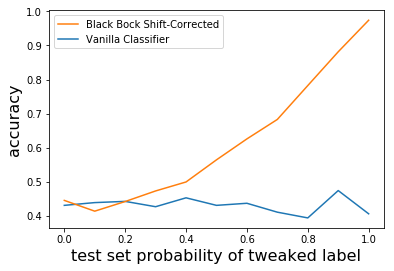

In [27]:
vanilla = plt.plot(np.arange(0,1.1, .1), label_p_unweighted.mean(axis=0), label='Vanilla Classifier' )
bbls = plt.plot(np.arange(0,1.1, .1), label_p_weighted.mean(axis=0), label='Black Bock Shift-Corrected')
plt.xlabel("test set probability of tweaked label", fontsize=16)  
plt.ylabel("accuracy", fontsize=16)  

plt.legend(handles=[bbls[0], vanilla[0]])


plt.savefig("tweak-one.png", bbox_inches='tight')